In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

In [5]:
# data set
data_url="https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/walmart_sales.csv"
df=pd.read_csv(data_url,parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         100 non-null    datetime64[ns]
 1   store_id     100 non-null    object        
 2   daily_sales  100 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.5+ KB


In [6]:
# STEP 2: Z-SCORE METHOD
# -----------------------------
df['z_score'] = (df['daily_sales'] - df['daily_sales'].mean()) / df['daily_sales'].std()
df['anomaly_z'] = df['z_score'].apply(lambda x: 1 if abs(x) > 2.5 else 0)

In [7]:
# STEP 3: DBSCAN METHOD
# -----------------------------
scaler = StandardScaler()
sales_scaled = scaler.fit_transform(df[['daily_sales']])
db = DBSCAN(eps=1.5, min_samples=5)
db_labels = db.fit_predict(sales_scaled)
df['anomaly_dbscan'] = (db_labels == -1).astype(int)

In [8]:
# STEP 4: One-Class SVM
# -----------------------------
svm = OneClassSVM(kernel='rbf', nu=0.05, gamma=0.001)
svm.fit(sales_scaled)
svm_pred = svm.predict(sales_scaled)
df['anomaly_svm'] = (svm_pred == -1).astype(int)

In [9]:
# STEP 5: Isolation Forest
# -----------------------------
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_pred = iso_forest.fit_predict(df[['daily_sales']])
df['anomaly_iforest'] = (iso_pred == -1).astype(int)

In [10]:
# STEP 6: Visualizations
# -----------------------------
def plot_anomalies(method_col, title, color):
    plt.figure(figsize=(12, 5))
    sns.lineplot(x='date', y='daily_sales', data=df, label='Sales')
    sns.scatterplot(
        x='date',
        y='daily_sales',
        data=df[df[method_col] == 1],
        color=color,
        label='Anomalies'
    )
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Daily Sales')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

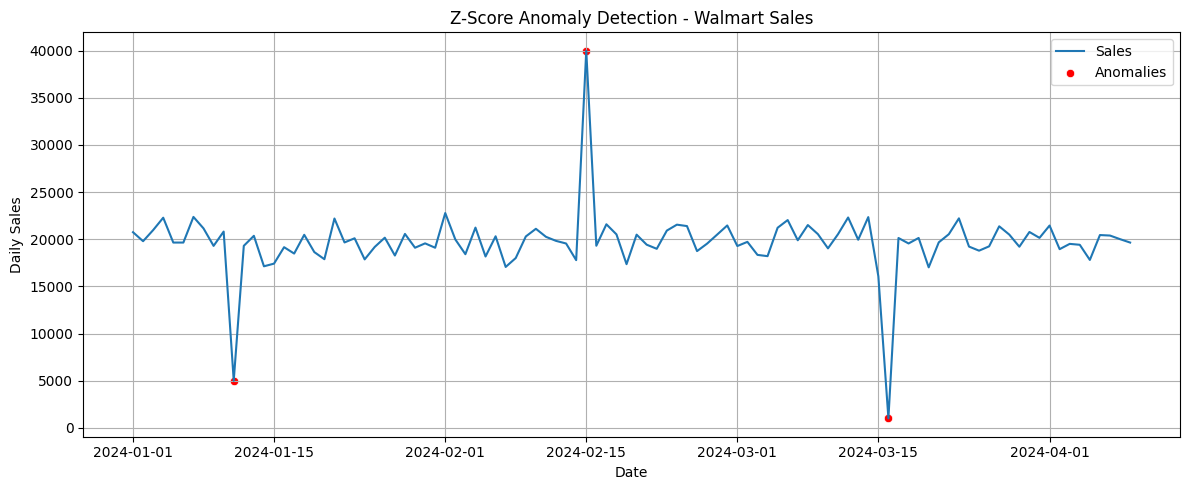

In [11]:
plot_anomalies('anomaly_z', 'Z-Score Anomaly Detection - Walmart Sales', 'red')


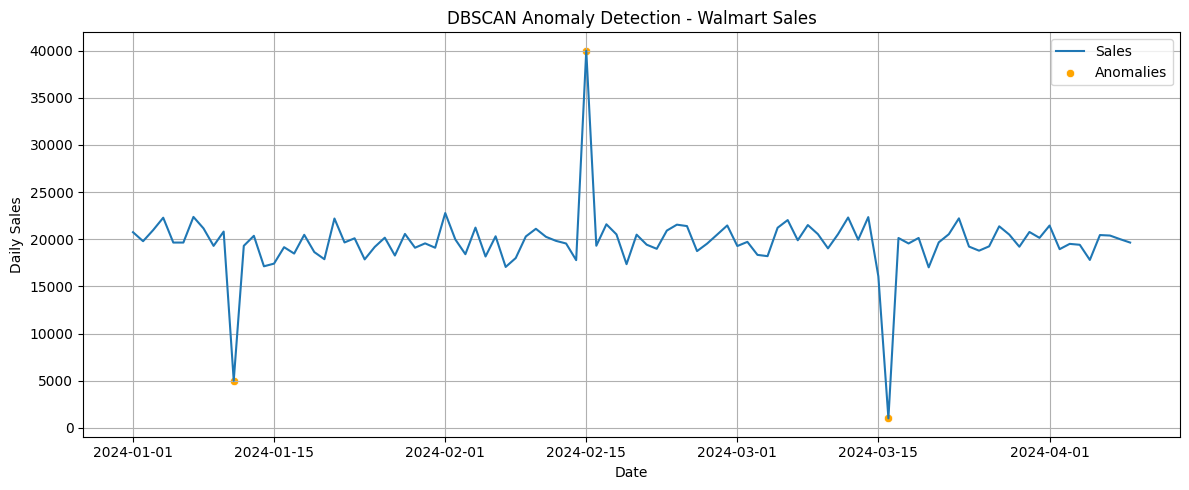

In [12]:
plot_anomalies('anomaly_dbscan', 'DBSCAN Anomaly Detection - Walmart Sales', 'orange')


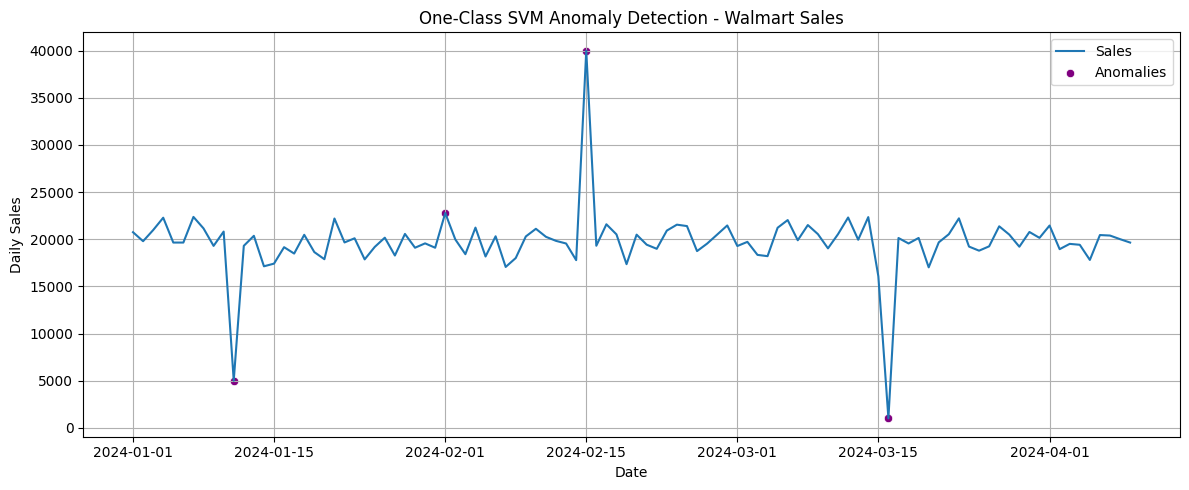

In [13]:
plot_anomalies('anomaly_svm', 'One-Class SVM Anomaly Detection - Walmart Sales', 'purple')


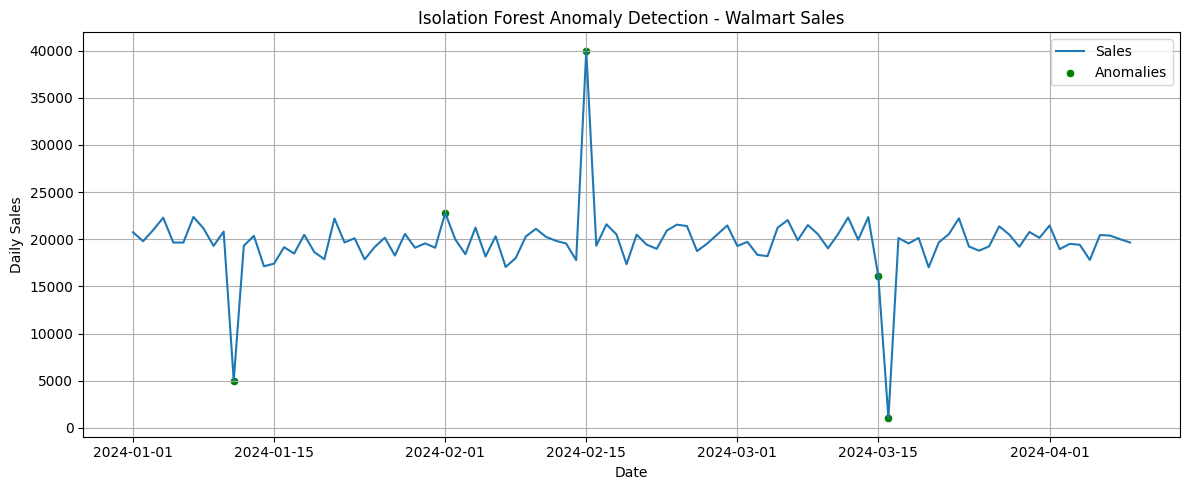

In [14]:
plot_anomalies('anomaly_iforest', 'Isolation Forest Anomaly Detection - Walmart Sales', 'green')
